# Hertzian contact 2
## Problem description
We will now consider what happens when a normal load $P$ is applied to the bodies. The bodies will move closer together on the application of this load. We will measure this movement from two 'distant points' in the bodies which can be thought of as experiancing no deformation ($T_1$ and $T_2$) and for convienience we will set the origin of our coordinate system a the point of first contact, coincedent with both of the surfaces. Thus, during loading the distant points $T_1$ and $T_2$ will move towards the origin by $\delta_1$ and $\delta_2$ respectively. 

If the bodies did not deform their profiles would overlap as shown in the widget by dotted lines. Due to the pressure at the interface the surface of each body is displaced parallel to the z axis by an amount $\bar{u}_{z1}$ and $\bar{u}_{z2}$(measured positive into each body) relative to the distant points.



In [6]:
import numpy as np
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plt.rcParams['figure.figsize'] = [15, 10]

In [11]:
@interact(interferance=(0,2.5))
def get_gap_from_interferance(interferance):
    """Plots the gap between 2 1D surfaces, which are both represented by parabolas 
    """
    fig, ax = plt.subplots()
    x = np.linspace(-5,5)
    y_top = 0.1 * x**2 - interferance
    y_bottom = -0.1 * x**2
    
    ax.plot(x, y_top, x, y_bottom)
    ax.fill_between(x, y_top, y_bottom, where=y_top <= y_bottom,
                     facecolor='green', interpolate=True)
    ax.set_ylim([-2.5,2.5])
    
    

interactive(children=(FloatSlider(value=1.25, description='interferance', max=2.5), Output()), _dom_classes=('…

After deformation the an area of the surfaces are in contact:

$\bar{u}_{z1}+\bar{u}_{z2}+h=\delta_1+\delta_2$ [1]

Substituting the definition of h (the gap between the surfaces with no load) from the previous section gives an equation for the elastic displacements in the contacting area:

$h=Ax^2+By^2$ [2]

$\bar{u}_{z1}+\bar{u}_{z2}=\delta - Ax^2 - By^2$ [3]

In the remaining, non contacting, area:

$\bar{u}_{z1}+\bar{u}_{z2}>\delta - Ax^2 - By^2$ [4]



As discused in the previous section Hertz simplified the analysis by asuming that each of the bodies can be represented as a half space in terms of it's response to stress. Thus, the problem will be solved by finding a mutual pressure distribution to act on two elastic half spaces over the contact area $S$ which produces deformations that fulfill equation 3 inside $S$ and equation 4 outside $S$. The integral of this pressure over the contact area should equal the total load pressing the bodies together:

$P = \iint_S p(x, y) ds$

## Solids of revolution
First we will consider contacts in which both surfaces are solids of revolution such as a sphere ($R_1'=R_1''=R_1$;$R_2'=R_2''=R_2$). In these cases the contact area is circular with a radius of $a$.

$A = B = \frac{1}{2} \left( \frac{1}{R_1} + \frac{1}{R_2} \right)$

Hertz proposed that a pressure distribution with the following form would give displacements that can satisfy the equations above:

$p = p_0(1-(r/a)^2)^\frac{1}{2}$

In the 'elastic half spaces' section of this course it is shown that the pressure distribution shown above gives the following deflections:

$u_z = \frac{1-v^2}{E} \frac{\pi p_0}{4a} (2a^2 - r^2),\ r \leq a$

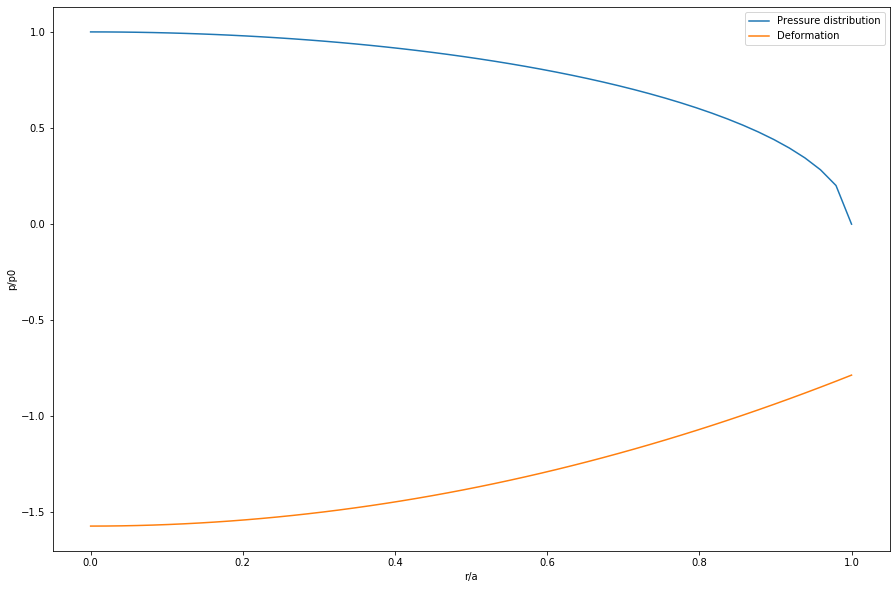

In [22]:
def parabolic_pressure():
    """Shows a parabolic pressure profile and the form of the deformation it causes inside the contact circle
    """
    r = np.linspace(0,1)
    p = (1-(r)**2)**0.5
    u_z = np.pi/4*(2-r**2)
    fig, ax = plt.subplots()
    ax.plot(r,p, label='Pressure distribution')
    ax.plot(r,-1*u_z, label='Deformation')
    ax.set_xlabel('r/a')
    ax.set_ylabel('p/p0')
    ax.legend()
parabolic_pressure()

We add the expressions for the deformations at the surface together to get the total deformation:

$u_{z1} + u_{z2} = \frac{1-v_1^2}{E_1} \frac{\pi p_0}{4a} (2a^2 - r^2) + \frac{1-v_2^2}{E_2} \frac{\pi p_0}{4a} (2a^2 - r^2)$

$u_{z1} + u_{z2} = \left(\frac{1-v_1^2}{E_1}+\frac{1-v_2^2}{E_2}\right) \frac{\pi p_0}{4a} (2a^2 - r^2)$

As shown, all of the material property terms for both surfaces are combined into one. This combined property is normally expressed as the reduced modulus:

$\frac{1}{E^*} = \left(\frac{1-v_1^2}{E_1}+\frac{1-v_2^2}{E_2}\right)$

Using this substitution and writing equation 3 for the shpherical case gives:

$u_{z1} + u_{z2} = \frac{\pi p_0}{4aE^*} (2a^2 - r^2) = \delta - (1/2R)r^2$

Where $R$ is the relative radius of curvature $\left(\frac{1}{R}= \frac{1}{R_1} + \frac{1}{R_2}\right)$



Substituting $r=0$ gives an expression for the mutual approach of distant points:

$\frac{ \pi p_0 a}{2E^*} = \delta$

While writing $r=a$ and then substituting the above definition back in gives the radius of the contact circle:

$\frac{\pi p_0 R}{2E^*} = a $

The total load compressing the bodies can be found by integrating the pressure distribution over the contact area:

$P = \int^a_0 p(r) 2 \pi r dr = \frac{2}{3} p_0\pi a^2$

In practice the total load is normally specified, and it is convienient to write the equations as follows:

$ a = \left(\frac{3PR}{4E^*}\right)^{1/3} $

$ \delta = \frac{a^2}{R} = \left(\frac{9P^2}{16RE^{*2}}\right)^{1/3}$

$ p_0 = \frac{3P}{2\pi a^2} = \left(\frac{6PE^{*2}}{\pi^3 R^2}\right)^{1/3} $

Before this can be accepted as THE solution it must be shown to be unique and it must satisfy the condition in equaiton 4. 

The deformation outside the loaded circle for this pressure distribution is:

$u_z = \frac{1-v^2}{E}\frac{p_0}{2a}((2a^2-r^2)sin-1(a/r)+r^2(a/r)(1-a^2/r^2)^{1/2}),\ r>a$

It is left to the reader, as an exercise to show that the hertz pressure distribution dosn't lead to contact outside the contact circle (r>a).

In terms of uniqueness the following pressure distribution, which is discused in the elastic half space section can be added  or subtracted while still satisfying the condition in equaiton 3 as it produces a uniform normal displacement inside the circle.

$ p = p_0'(1-(r/a)^2)^{-1/2} $

However this gives unphysical results, the nature of these results is also left to the reader to find. 